## Matplotlib and Seaborn Part II

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Regression

In [3]:
fuel_econ = pd.read_csv('fuel-econ.csv')
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


Text(0,0.5,'Combined Fuel Eff. (mpg)')

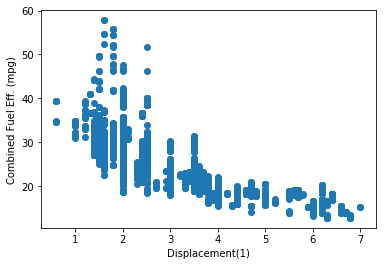

In [4]:
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb')
plt.xlabel('Displacement(1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

Text(0,0.5,'Combined Fuel Eff. (mpg)')

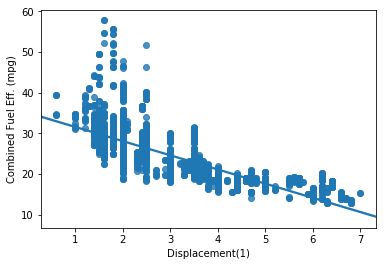

In [6]:
# use sns to add the regression line
sns.regplot(data = fuel_econ, x = 'displ', y = 'comb')
plt.xlabel('Displacement(1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

Text(0,0.5,'Combined Fuel Eff. (mpg)')

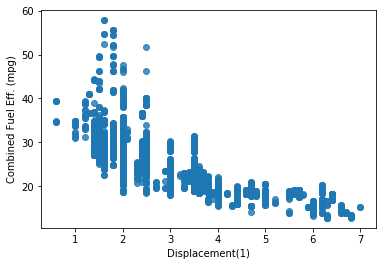

In [7]:
sns.regplot(data = fuel_econ, x = 'displ', y = 'comb', 
            fit_reg = False) # turn off the regression line
plt.xlabel('Displacement(1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

([<matplotlib.axis.YTick at 0x1a0d1679e8>,
 <a list of 6 Text yticklabel objects>)

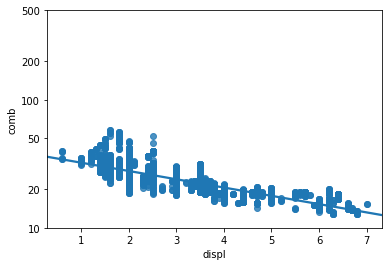

In [9]:
# log transformation of the data

def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sns.regplot(fuel_econ['displ'], fuel_econ['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100, 200, 500]
plt.yticks(log_trans(tick_locs), tick_locs)

### 2. Overplotting, transparency, and jitter